### Packages

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report, roc_curve, auc, log_loss, f1_score, precision_score, accuracy_score, recall_score, roc_auc_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

from IPython.display import Markdown, display 
def printmd(string):  
    display(Markdown(string)) 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### Datasets

In [12]:
dataset = pd.read_csv('datasets/SCALED.csv')

images_to_drop = ["image_249.jpg", "image_465.jpg", "image_503.jpg", "image_86.jpg", "image_87.jpg",
                 "image_496.jpg", "image_70.jpg", "image_36.jpg", "image_301.jpg", "image_185.jpg",
                 "image_144.jpg", "image_12.jpg", "image_18.jpg", "image_453.jpg", "image_481.jpg",
                 "image_529.jpg", "image_559.jpg", "image_87.jpg", "image_4.jpg", "image_470.jpg",
                 "image_396.jpg"]

mask = dataset['image_name'].isin(images_to_drop)
dataset = dataset[~mask]

dataset = dataset.set_index('image_name')

In [13]:
ratings = dataset[['seba_binary' ,'seba_quintary', 'piotr_binary',
       'piotr_quintary', 'maciej_binary', 'maciej_quintary', 'karol_binary',
       'karol_quintary', 'michal_binary', 'michal_quintary']]
ratings = ratings.astype("category")

ratings_to_remove = ['seba_binary' , 'piotr_binary',
       'piotr_quintary', 'maciej_binary', 'maciej_quintary', 'karol_binary',
       'karol_quintary', 'michal_binary', 'michal_quintary', 'rational_one', 'rational_two']
dataset = dataset.drop(ratings_to_remove, axis = 1)
dataset.seba_quintary = dataset.seba_quintary.astype("category")

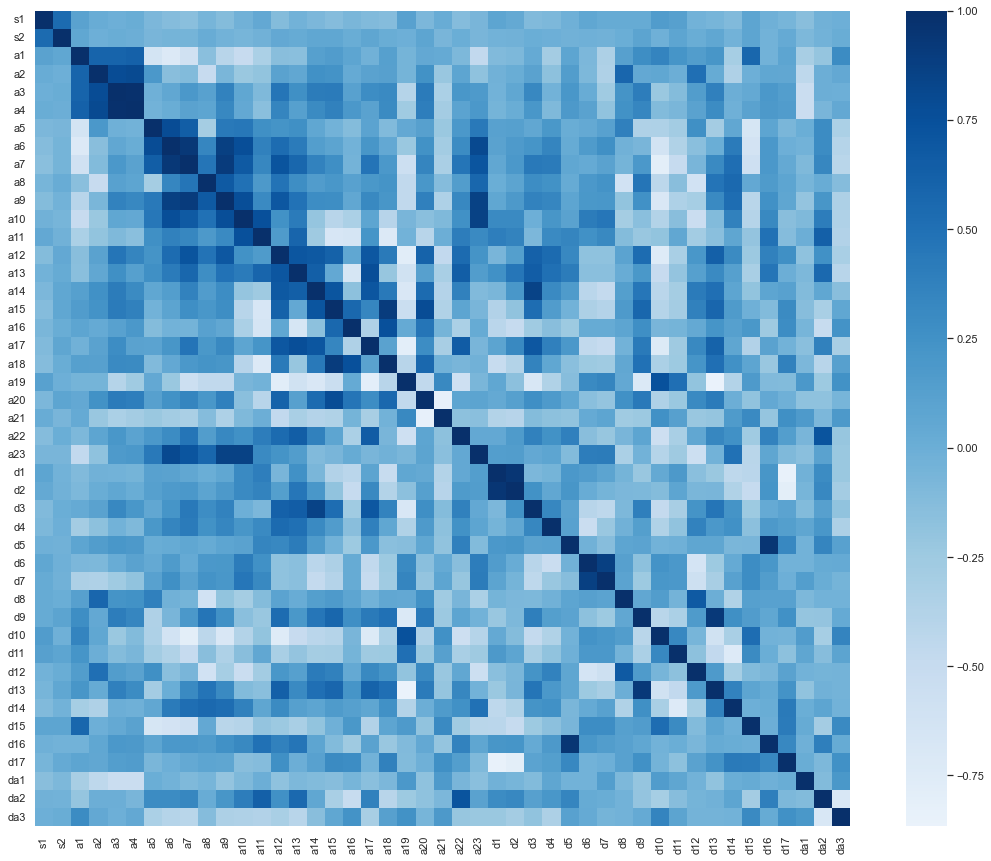

In [14]:
plt.figure(figsize=(20, 15))
sns.set(style="white")
corr = dataset.corr('pearson')
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, cmap='Blues', center=0,
            square=True, annot = False);

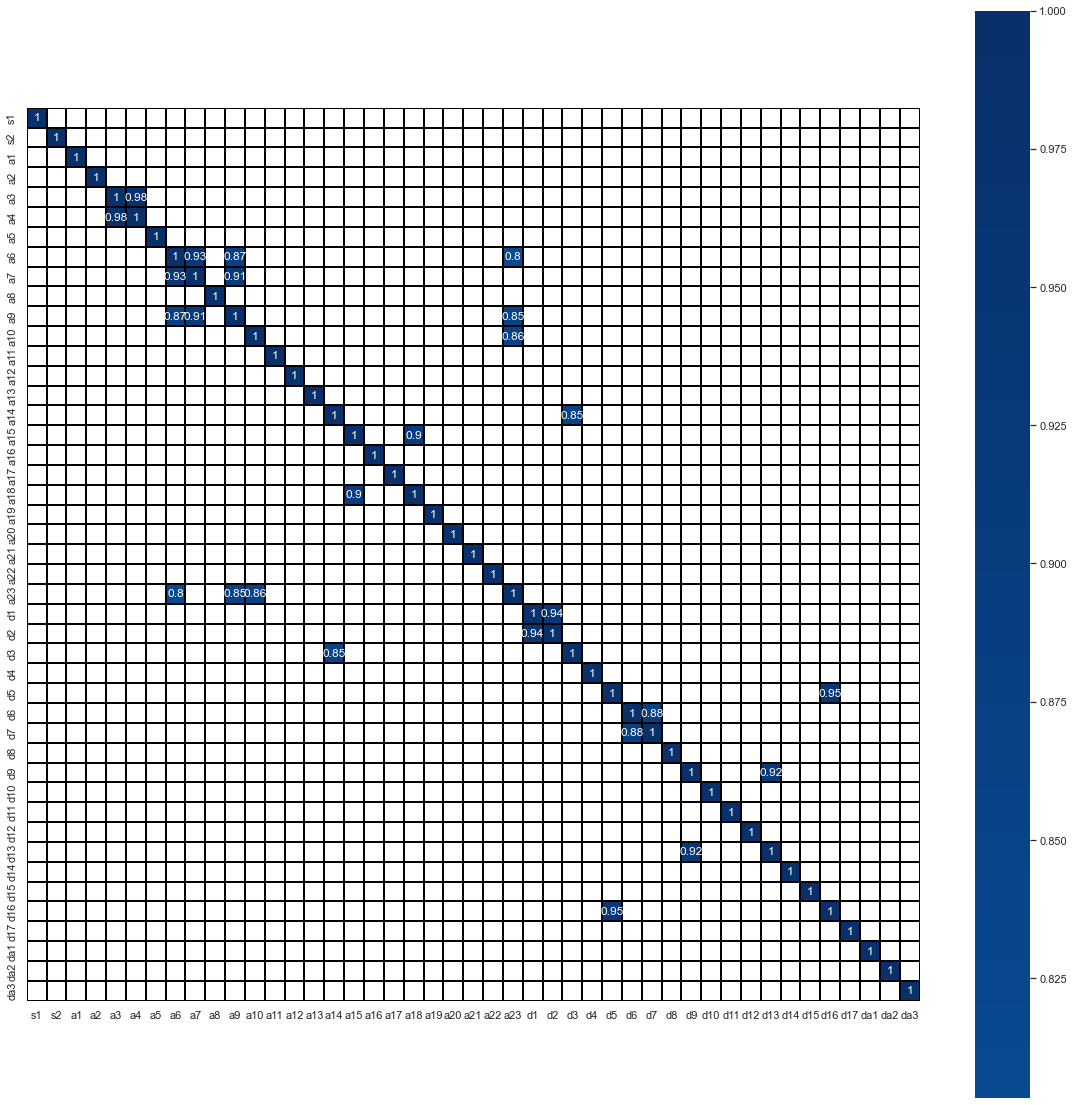

In [15]:
sns.set(style="white")
corr = dataset.corr('pearson')
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

mask = corr < 0.8

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(600, 550, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap='Blues', center=0,
            square=True, annot = True, linewidths=.2, linecolor = 'black');

In [16]:
variables_to_remove = ['a9','a23', 'd3', 'd13', 'd16']
dataset = dataset.drop(variables_to_remove, axis = 1)

### Dictionary


**s1 = eye_area_symmetry** right_eye_area / left_eye_area
    

**s2 = eye_length_symmetry** right_eye_length/left_eye_length


    
#### area ratios

**a1 = eyes_to_lips** right_eye_area + left_eye_area / lip_area
    

**a2 = eyes_to_nose** right_eye_area + left_eye_area / nose_area
    

**a3 = eyes_to_face** (right_eye_area + left_eye_area) / face_area
    

**a4 = eyes_to_top_face** (right_eye_area + left_eye_area) / top_face_area
    

**a5 = lips_to_nose** lip_area / nose_area
    

**a6 = lips_to_face** lip_area / face_area
    

**a7 = lips_to_lower_face** lip_area / lower_face_area
    

**a8 = nose_to_face** nose_area / face_area
    

**a9 = eyes_lips_nose_to_face** (right_eye_area + left_eye_area + lip_area + nose_area) / face_area)
    

**a10 = eyes_lips_nose_to_inner_face** (right_eye_area + left_eye_area + lip_area + nose_area) / inner_triangle_area
    

**a11 = features_to_triangle** features_area / inner_triangle_area
    

**a12 = features_to_face** features_area / face_area
    

**a13 = features_to_outer** features_area / (left_outer_face_area + right_outer_face_area)
    

**a14= inner_to_outer** inner_triangle_area / (left_outer_face_area + right_outer_face_area)
    

**a15 = inner_to_face** inner_triangle_area / face_area
    

**a16 = outer_to_face** left_outer_face_area + right_outer_face_area) / face_area
    

**a17 = top_face_to_face** top_face_area / face_area
    

**a18 = upper_face_to_face** upper_face_area / face_area
    

**a19 = lower_face_to_face** lower_face_area / face_area
    

**a20 = bottom_face_to_face** bottom_face_area / face_area
    

**a21 = upper_to_bottom** upper_face_area / bottom_face_area
    

**a22 = vision_to_face** right_vision_area + left_vision_area / face_area


**a23 = nose_lips_eyes_to_features_area** (nose_area + right_eye_area + left_eye_area + lip_area) / features_area
    
#### distances
    

**d1 = face_length_to_width_top** face_length / face_width_at_top
    

**d2 = face_length_to_width_bottom** face_length / face_width_at_bottom
    

**d3 = face_top_to_bottom_width** face_width_at_top/face_width_at_bottom
    

**d4 = eye_distance_to_face_width** eye_distance /  face_width_at_top
    

**d5 = eyebrows_to_face_width** (right_eyebrow_length + left_eyebrow_length) / face_width_at_top
    

**d6 = mouth_to_eye_distance** mouth_length / eye_distance
    

**d7 = mouth_to_eye_spread** mouth_length / eye_outer_distance
    

**d8 = mouth_to_nose_width** mouth_length / nose_width
    

**d9 = nose_length_to_face_length** nose_length/face_length
    

**d10 = bottom_distance_to_face** chin_to_mouth_distance / face_length
    

**d11 = nose_to_mouth_to_face** mouth_to_nose_distance / face_length
       

**d12 = eye_distance_to_nose_width** eye_distance / nose_width
    

**d13 = nose_length_to_nose_to_chin_distance** nose_length / nose_to_chin_distance
    

**d14 = nose_width_to_nose_mouth_distance** nose_width / mouth_to_nose_distance


**d15 = mouth_length_to_width** mouth_length / mouth_width


**d16 = features_length_to_face_width** (right_eyebrow_length + left_eyebrow_length + mouth_length + left_eyebrow_length + right_eyebrow_length) / face_width_at_top)


**d17 = features_length_to_face_length** (right_eyebrow_length + left_eyebrow_length + mouth_length + left_eyebrow_length + right_eyebrow_length) / face_length
    
    
    
#### distances and areas
    

**da1 = eyebrows_to_eyes** (right_eyebrow_length + left_eyebrow_length) / (right_eye_area + left_eye_area))
    

**da2 = vision_to_face_width** (right_vision_area + left_vision_area) / face_width_at_top)


**da3 = features_length_to_features_area** (right_eyebrow_length + left_eyebrow_length + mouth_length + left_eyebrow_length + right_eyebrow_length) / features_area

### Data Split

In [17]:
X = dataset.drop('seba_quintary', axis = 1)
y = dataset['seba_quintary']

le = LabelEncoder()
y = le.fit_transform(y)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y, shuffle = True)

In [18]:
params = {"n_estimators":[100, 200, 300],
              "max_features":['auto', 'sqrt'],
              "max_depth":[3,4],
              "min_samples_split":[2,3],
              "min_samples_leaf":[2,3],
              "bootstrap" : [True, False]}
random_forest = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=5,  random_state=False, shuffle = True)

grid_search_random_forest = GridSearchCV(random_forest, params, n_jobs=5, cv=kfold,  scoring='accuracy', verbose=2, refit=True)
grid_search_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=False, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        49
           1       0.50      0.57      0.53        49
           2       0.41      0.29      0.34        48
           3       0.46      0.51      0.49        49
           4       0.66      0.51      0.57        49

    accuracy                           0.56       244
   macro avg       0.55      0.56      0.55       244
weighted avg       0.55      0.56      0.55       244

SCORE : 0.5573770491803278
BEST PARAMETERS : {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


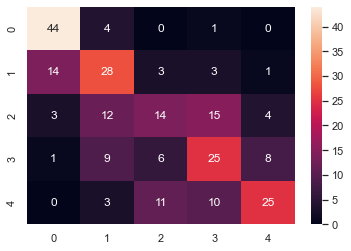

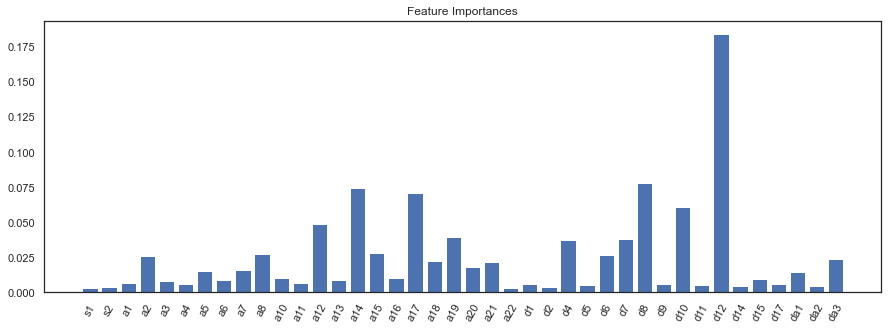

In [19]:
preds = grid_search_random_forest.predict(X_test)

print(classification_report(y_test, preds))
print("SCORE :",grid_search_random_forest.score(X_test, y_test))
print("BEST PARAMETERS :", grid_search_random_forest.best_params_)

sns.heatmap(confusion_matrix(y_test, preds), annot = True);

plt.figure(figsize = (15,5))
plt.bar(np.arange(X.shape[1]), grid_search_random_forest.best_estimator_.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

In [20]:
precision = precision_score(y_test, preds, average = None)
recall = recall_score(y_test, preds, average='micro')
f1 = f1_score(y_test, preds, average='micro') 

In [21]:
print(precision, recall, f1)

[0.70967742 0.5        0.41176471 0.46296296 0.65789474] 0.5573770491803278 0.5573770491803278


### xgboost

In [30]:
params = {"learning_rate":[0.05, 0.06],
              "max_depth":[3,4, 5],
              "min_child_weight":[1],
              "colsample_bytree":[0.6],
              "n_estimators":[100, 200],
              "subsample" : [0.6],
               "reg_alpha" : [5]}


model_xgb = XGBClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=5,  random_state=False, shuffle = True)

grid_search_xgboost = GridSearchCV(model_xgb, params, n_jobs=5, cv=kfold,  
                                       scoring='accuracy', verbose=2, refit=True)

grid_search_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=False, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.6],
                         'learning_rate': [0.05, 0.06], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 2], 'n_estimators': [100, 200],
                         'reg_alpha': [5, 10], 'subsample': [0.6]},
             scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.60      0.63      0.61        49
           2       0.55      0.46      0.50        48
           3       0.57      0.65      0.61        49
           4       0.71      0.59      0.64        49

    accuracy                           0.65       244
   macro avg       0.65      0.65      0.65       244
weighted avg       0.65      0.65      0.65       244

SCORE : 0.6516393442622951
BEST PARAMETERS : {'colsample_bytree': 0.6, 'learning_rate': 0.06, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 5, 'subsample': 0.6}


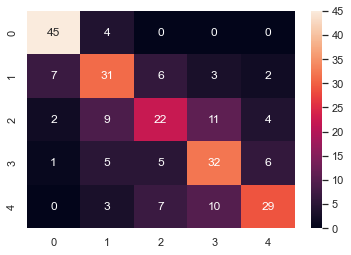

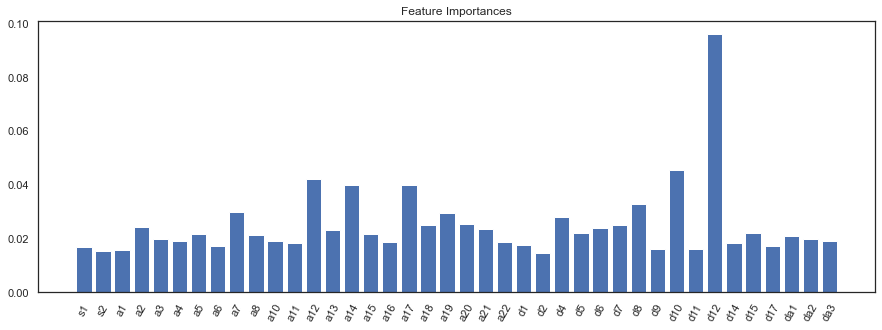

In [31]:
preds = grid_search_xgboost.predict(X_test)

print(classification_report(y_test, preds))
print("SCORE :",grid_search_xgboost.score(X_test, y_test))
print("BEST PARAMETERS :", grid_search_xgboost.best_params_)

sns.heatmap(confusion_matrix(y_test, preds), annot = True);

plt.figure(figsize = (15,5))
plt.bar(np.arange(X.shape[1]), grid_search_xgboost.best_estimator_.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation = 60)
plt.title('Feature Importances');
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed